# Import

In [61]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.tools import mpl_to_plotly as ggplotly
from plotnine import *

# Read In

In [5]:
complete = pd.read_csv('../data/nyra_2019_complete.csv', 
                       dtype={'program_number': str,
                              'track_condition': str,
                              'race_type':str,
                              'post_time':str}
                    )

# EDA

In [6]:
complete.head()

,track_id,race_date,race_number,program_number,trakus_index,latitude,longitude,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time,weight_carried,jockey,odds
0,AQU,2019-01-01,9,6,72,40.672902,-73.827607,600,D,GD,48,CLM,25000,00420,120,Andre Shivnarine Worrie,2090
1,AQU,2019-01-01,9,6,73,40.672946,-73.827587,600,D,GD,48,CLM,25000,00420,120,Andre Shivnarine Worrie,2090
2,AQU,2019-01-01,9,6,74,40.672990,-73.827568,600,D,GD,48,CLM,25000,00420,120,Andre Shivnarine Worrie,2090
3,AQU,2019-01-01,9,6,63,40.672510,-73.827781,600,D,GD,48,CLM,25000,00420,120,Andre Shivnarine Worrie,2090
4,AQU,2019-01-01,9,6,64,40.672553,-73.827762,600,D,GD,48,CLM,25000,00420,120,Andre Shivnarine Worrie,2090


### How many lines per race? How many lines per horse per race?

Typically between 300 and 400.

In [59]:
lines_by_horse_and_race = (
        complete
                .groupby(['track_id', 
                        'race_date', 
                        'race_number']
                        )
                ['program_number']
                .value_counts()
                .sort_index()
                .rename('trakus_indices')
                .reset_index()
)

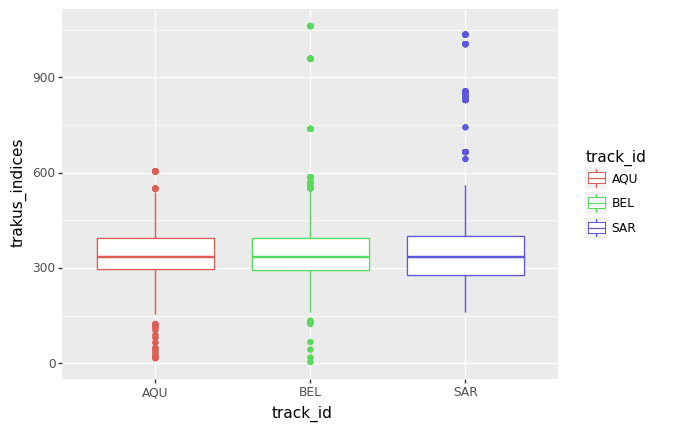

<ggplot: (122185537131)>

In [66]:
(
    ggplot(lines_by_horse_and_race,
           aes(x = 'track_id',
               color = 'track_id',
               y = 'trakus_indices'
            )
        )
    + geom_boxplot()
)

### How many horses per race?

Typically between 6 and 9.

In [25]:
horse_count_by_race = (
  complete
      .groupby(['track_id', 
                'race_date', 
                'race_number']
              )
      ['program_number']
      .nunique()
      .rename('count_of_horses')
      .reset_index()
)

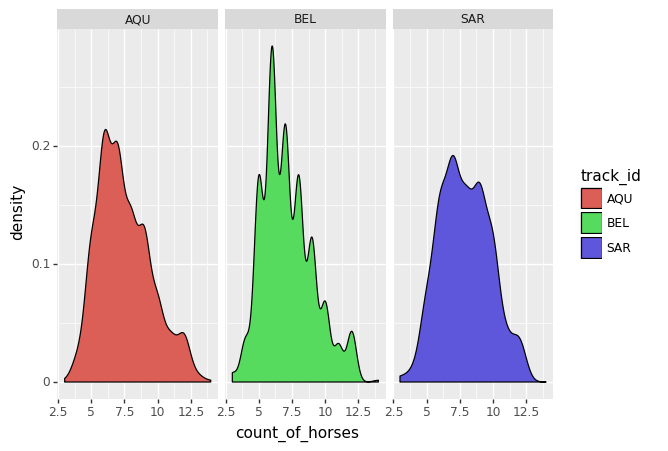

<ggplot: (122154821759)>

In [46]:
(
    ggplot(horse_count_by_race, aes(x = 'count_of_horses', 
                                    fill = 'track_id'
                                    )
        )
    + geom_density()
    + facet_wrap('~track_id')
)

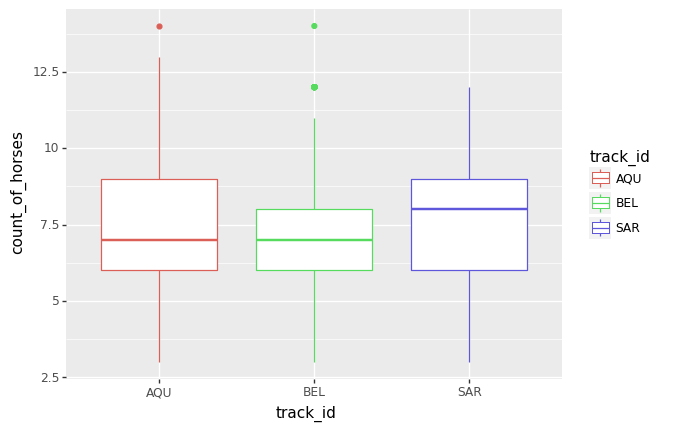

<ggplot: (122155053234)>

In [51]:
(
    ggplot(horse_count_by_race,
           aes(x = 'track_id',
               color = 'track_id',
               y = 'count_of_horses')
        )
    + geom_boxplot()
)